In [150]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [151]:
dataframe = pd.read_csv("spotify.csv")

In [152]:
df = pd.DataFrame(dataframe)

In [153]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [154]:
"""Q1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful"""
df.isnull().sum() #No null values found in the dataset

df.duplicated().sum() #27 duplicat rows were there
df.drop_duplicates(inplace=True, keep="first")
df.duplicated().sum()

np.int64(0)

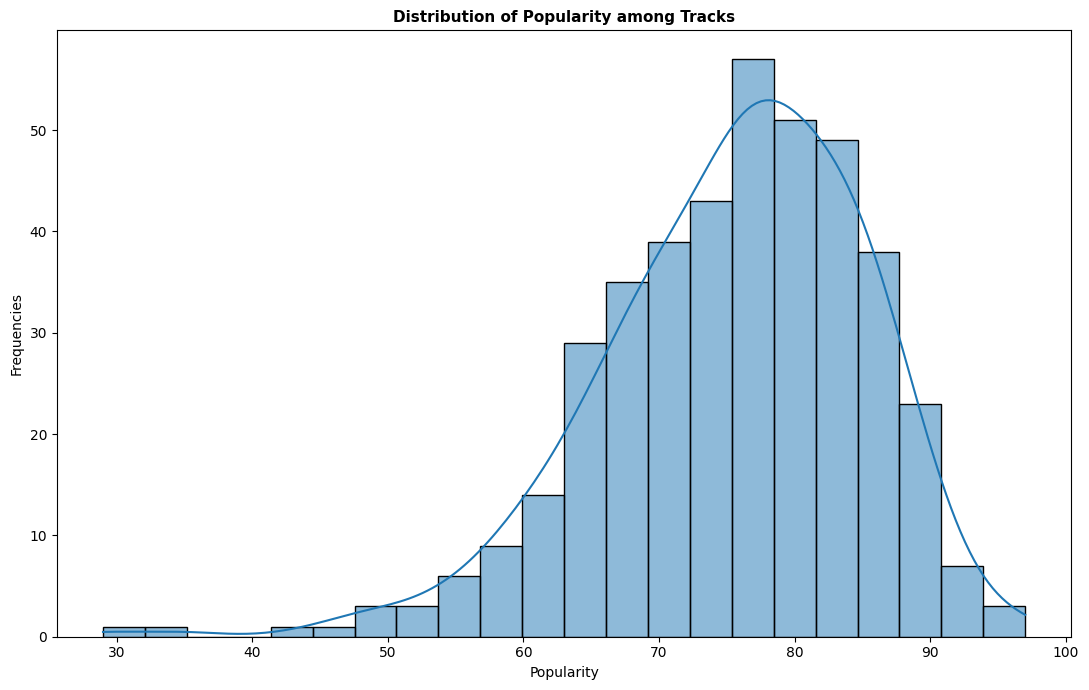

In [155]:
# Q2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
df.rename(columns={"Track Name\t": "Track Name"}, inplace=True)
plt.figure(figsize=(11, 7))
sns.histplot(df['Popularity'], kde=True)  # Histogram with KDE curve
plt.title("Distribution of Popularity among Tracks", fontweight="bold", fontsize=11)
plt.xlabel("Popularity")
plt.ylabel("Frequencies")
plt.tight_layout()
plt.show()


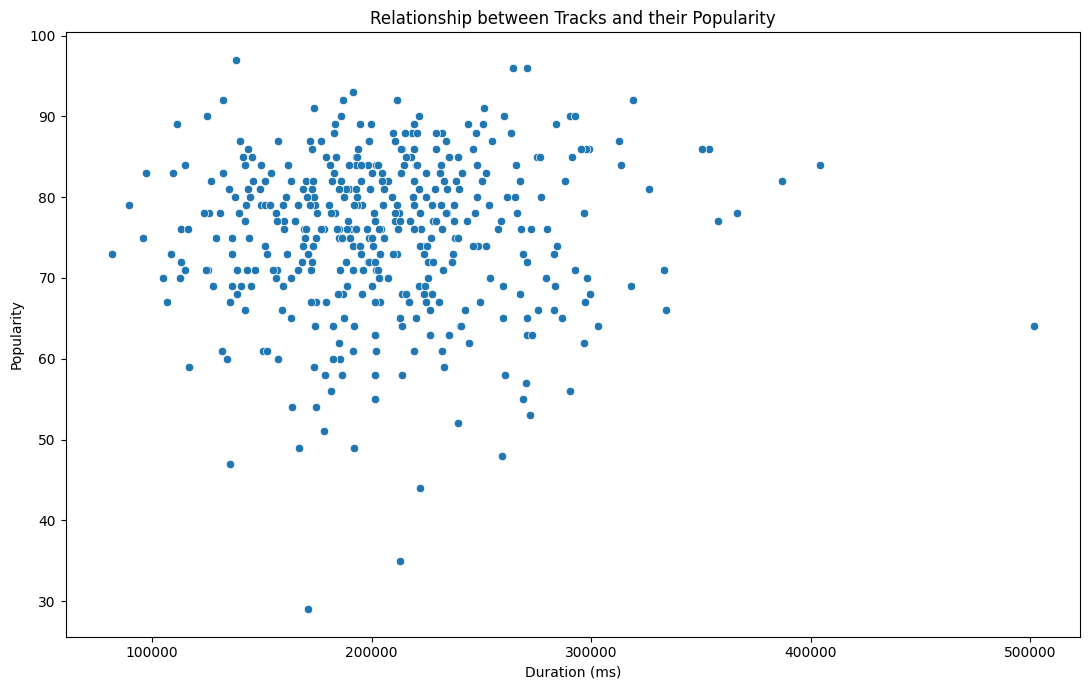

In [156]:
# 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

df.rename(columns=lambda x:x.strip() , inplace=True)
plt.figure(figsize=(11,7))
sns.scatterplot(x="Duration (ms)",y="Popularity", data=df)
plt.title("Relationship between Tracks and their Popularity")

plt.tight_layout()
plt.show()

<Figure size 700x400 with 0 Axes>

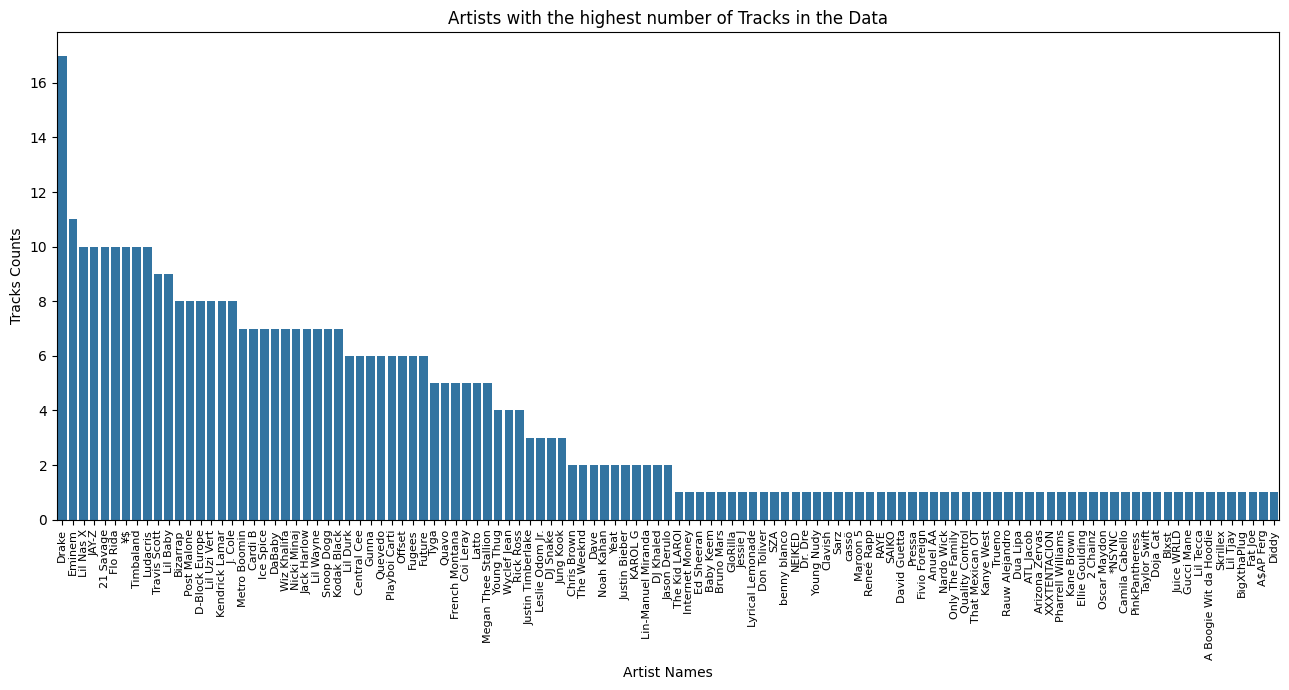

In [169]:
"""Q4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot"""
plt.figure(figsize=(7,4))
track_counts = df['Artist'].value_counts().reset_index()
track_counts.columns = ['Artist', 'Track Count']

# Making Countplot
plt.figure(figsize=(13,7))
sns.countplot(x="Artist", data=df, order=df["Artist"].value_counts().index)
plt.title("Artists with the highest number of Tracks in the Data")
plt.xticks(rotation=90,fontsize=8) 
plt.ylabel("Tracks Counts")
plt.xlabel("Artist Names")
plt.tight_layout()
plt.show()

In [158]:
# 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each!
# df.Popularity.sort_values(ascending=True).head()

# approach1
# group = df.groupby(["Artist","Track Name"])["Popularity"].mean().sort_values(ascending=True).head(5).reset_index()

# Approach two
df.sort_values(by="Popularity", ascending=True).head()[["Artist", "Track Name", "Popularity"]]
group



,Artist,Track Name,Popularity
0,Pressa,Attachments (feat. Coi Leray),29.0
1,Justin Bieber,Intentions,35.0
2,French Montana,Splash Brothers,44.0
3,Lil Baby,On Me - Remix,47.0
4,Wyclef Jean,911 (feat. Mary J. Blige),48.0


In [159]:
'''6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist'''
df["Average Popularity"] = df.groupby("Artist")["Popularity"].transform("mean")

# df.sort_values(by="Popularity",ascending=False).head()[["Artist","Track Name", "Popularity", "Average Popularity"]]
df.groupby("Artist")["Average Popularity"].mean().sort_values(ascending=False).head().reset_index()

,Artist,Average Popularity
0,cassö,92.000000
1,Trueno,89.000000
2,David Guetta,87.000000
3,Travis Scott,86.555556
4,¥$,85.100000


In [160]:
# 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist!
top_artists = df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False).head().index

top_artists_df = df[df["Artist"].isin(top_artists)]

top_tracks = top_artists_df.loc[top_artists_df.groupby("Artist")["Popularity"].idxmax()][["Artist", "Track Name","Popularity"]]

top_tracks.sort_values(by="Popularity",ascending=False)



,Artist,Track Name,Popularity
260,¥$,CARNIVAL,96
30,Travis Scott,FE!N (feat. Playboi Carti),93
140,cassö,Prada,92
241,Trueno,Mamichula - con Nicki Nicole,89
200,David Guetta,Baby Don't Hurt Me,87


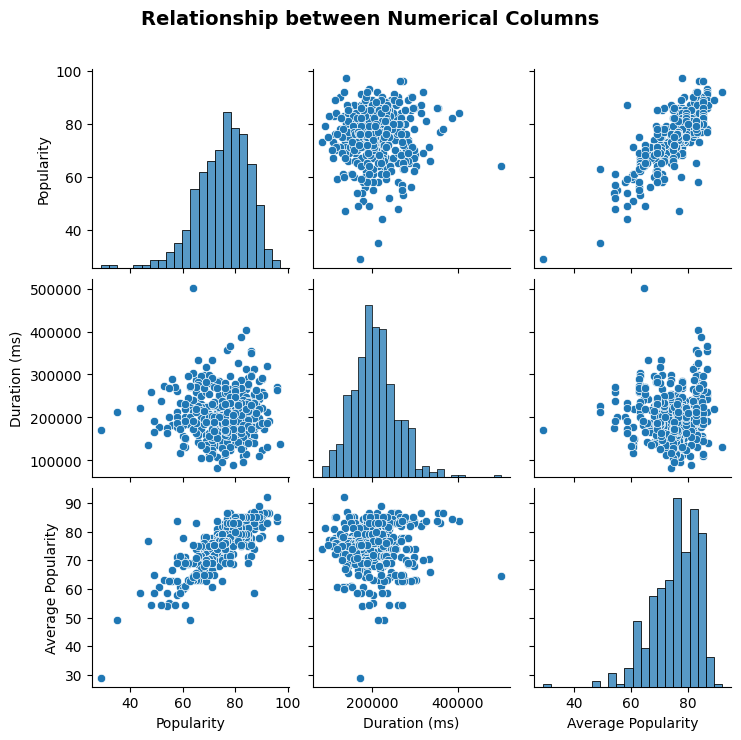

In [161]:
# 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot!
number_columns = df[[feature for feature in df.columns if df[feature].dtypes == "int64" or df[feature].dtypes =="float64"]]
g = sns.pairplot(number_columns)
g.fig.suptitle('Relationship between Numerical Columns', fontweight='bold', fontsize=14, ha='center', va='top')
# sns.pairplot(number_columns, palette = "coolwarm")
plt.subplots_adjust(top=0.9)


plt.show()

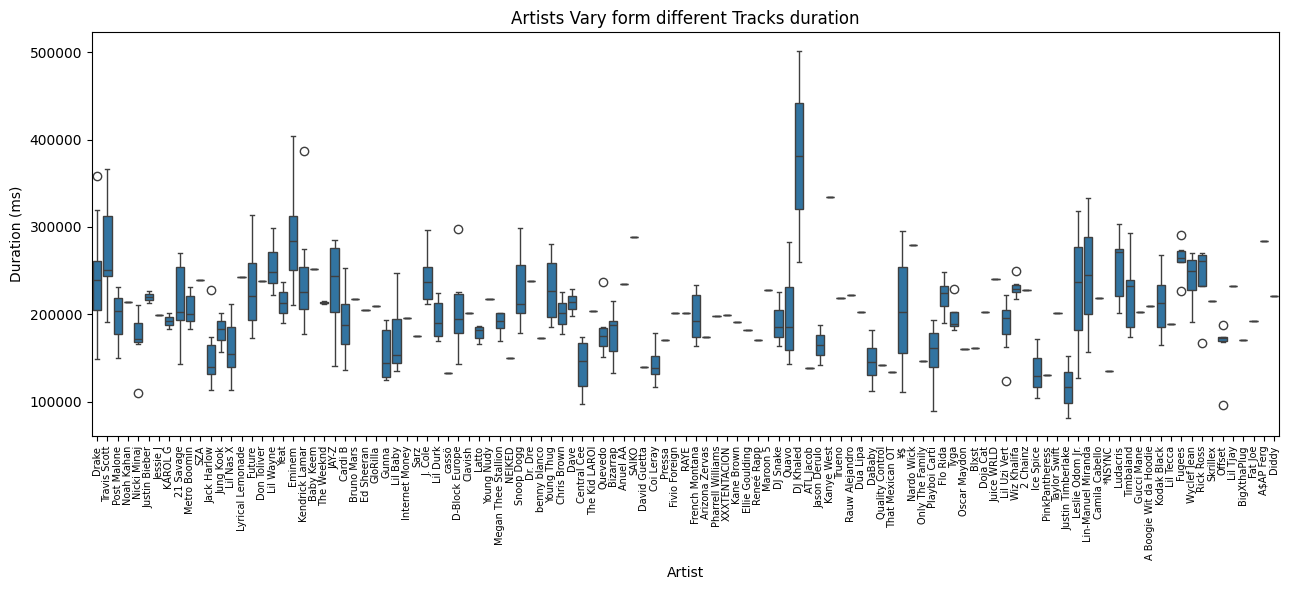

In [167]:
'''
9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot'''
plt.figure(figsize=(13,6))

sns.boxplot(x="Artist", y="Duration (ms)", data=df)
plt.title("Artists Vary form different Tracks duration")
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
"""
Insights:
   Yes every track duration is varying significantly across different artists.
"""
plt.show()

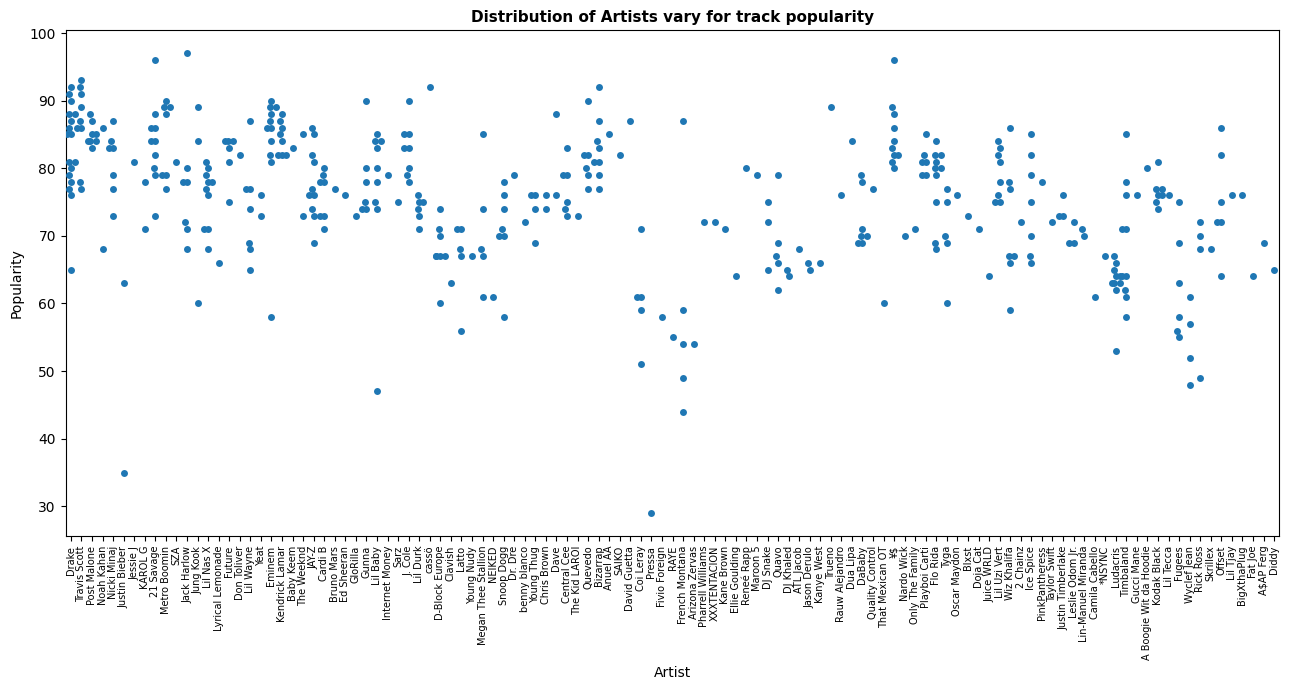

In [166]:
'''
10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.'''
plt.figure(figsize=(13,7))
sns.swarmplot(x="Artist",y="Popularity", data=df)

plt.title("Distribution of Artists vary for track popularity",fontsize=11,fontweight='bold')
plt.xticks(rotation=90,fontsize=7)
plt.tight_layout()
plt.show()